In [216]:
import pandas as pd 
import numpy as np
# import warnings as wr 
# wr.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder

In [217]:
# Import Dataset
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [218]:

le = LabelEncoder()

In [219]:

df.Gender = le.fit_transform(df[['Gender']])


In [220]:
df.head()


,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [221]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [222]:
# Separate dataset
x = df.drop(["Weight"], axis=1)
x


,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [223]:
y = df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [224]:
# Train = 70%, Test = 30%

from sklearn.model_selection import train_test_split

In [225]:
xtrain,  xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)


In [226]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [227]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)


LinearRegression()

In [228]:
y_predict = reg.predict(xtest)
y_predict

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753], shape=(2567,))

In [229]:
# Test accuracy
reg.score(xtest, ytest)


0.9059112424422658

In [230]:
# Train Accuracy
reg.score(xtrain, ytrain)

0.8973793060969246

In [231]:
from sklearn.metrics import mean_squared_error

In [232]:
# MSE
mse = mean_squared_error(ytest, y_predict)
mse

96.83734437830613

In [233]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor


In [234]:
n = KNeighborsRegressor()
xtrainone, xtestone, ytrainone, ytestone = train_test_split(x,y, test_size=0.3, random_state=42)
n.fit(xtrainone, ytrainone)

KNeighborsRegressor()

In [235]:
y_n_predict = n.predict(xtestone)
y_n_predict

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ], shape=(2567,))

In [236]:
n.score(xtrainone, ytrainone)

0.9172142723737918

In [237]:
n.score(xtestone, ytestone)

0.8821086423439015

In [238]:
n_mse = mean_squared_error(ytestone, y_n_predict)
n_mse

121.33528273624482

In [239]:
# Compare with figure
import matplotlib.pyplot as plt



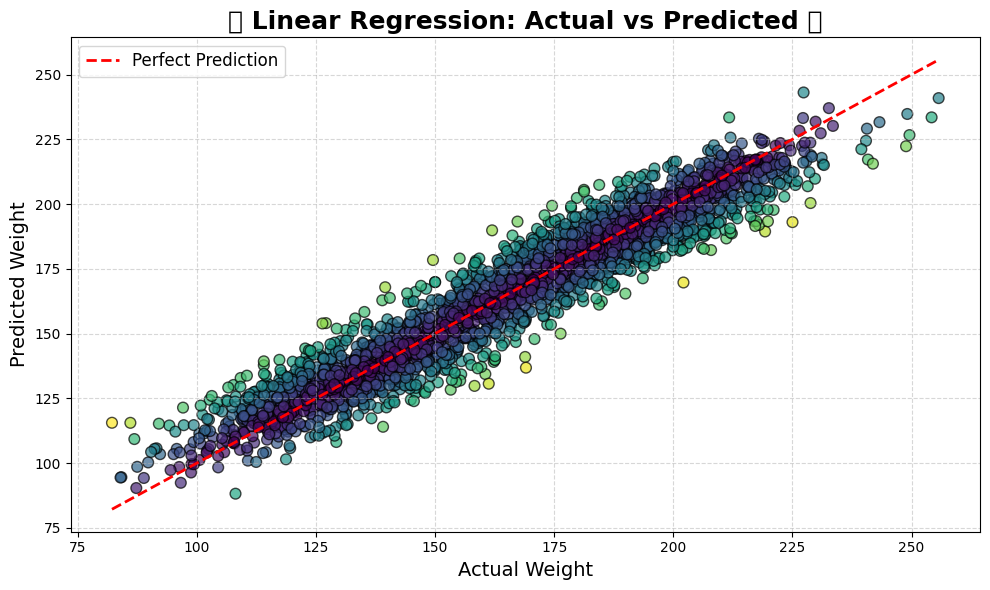

In [240]:
plt.figure(figsize=(10, 6))


plt.scatter(ytest, y_predict, 
            c=np.abs(ytest - y_predict), 
            cmap='viridis', 
            alpha=0.7, 
            edgecolors='k', 
            s=60)

x_line = np.linspace(ytest.min(), ytest.max(), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title("🔹 Linear Regression: Actual vs Predicted 🔹", fontsize=18, weight='bold')
plt.xlabel("Actual Weight", fontsize=14)
plt.ylabel("Predicted Weight", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

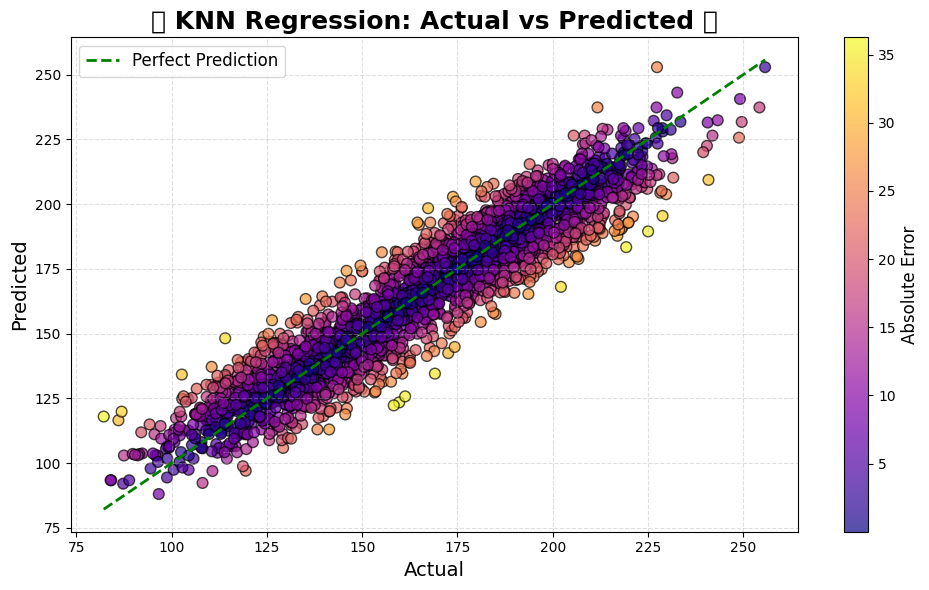

In [241]:
# KNN Regression plot

plt.figure(figsize=(10, 6))

plt.scatter(
    ytestone,
    y_n_predict,
    c=np.abs(ytestone - y_n_predict),
    cmap='plasma',
    s=60,
    alpha=0.7,
    edgecolor='k'
)


x_line = np.linspace(ytestone.min(), ytestone.max(), 100)
plt.plot(
    x_line,
    x_line,
    color='green',
    linestyle='--',
    linewidth=2,
    label='Perfect Prediction'
)


plt.title("🔹 KNN Regression: Actual vs Predicted 🔹", fontsize=18, weight='bold')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)


plt.grid(True, linestyle='--', alpha=0.4)


plt.legend(fontsize=12, loc='upper left')


cbar = plt.colorbar()
cbar.set_label('Absolute Error', fontsize=12)


plt.tight_layout()

plt.show()

In [242]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [243]:

xtwo = df.drop(["Gender"], axis=1)
xtwo

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [244]:
df["Gender"] = le.inverse_transform(df["Gender"])

ytwo = df["Gender"]
ytwo

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
8550    Female
8551    Female
8552    Female
8553    Female
8554    Female
Name: Gender, Length: 8555, dtype: object

In [245]:
xtraintwo, xtesttwo, ytraintwo, ytesttwo = train_test_split(xtwo, ytwo, test_size=0.3,  random_state=42)

xtraintwo.shape


(5988, 2)

In [246]:
nc = KNeighborsClassifier()


In [247]:
nc.fit(xtraintwo, ytraintwo)

KNeighborsClassifier()

In [248]:
y_nc_predict = nc.predict(xtesttwo)
y_nc_predict

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      shape=(2567,), dtype=object)

In [249]:
nc.score(xtraintwo, ytraintwo)

0.9291917167668671

In [250]:
nc.score(xtesttwo, ytesttwo)

0.9131281651733542